# DFT calculation of Graphene

In [1]:
#import all the needed libraries
from ase import Atoms
from ase.io import write, read
from ase.lattice.hexagonal import *
from ase.visualize import view
from ase.units import Bohr
from ase.lattice.cubic import BodyCenteredCubic
from ase.build import bulk
from gpaw import GPAW, FermiDirac, PoissonSolver, Mixer
import numpy as np
import matplotlib.pyplot as plt
import sys
from IPython.display import Image, display
import warnings; warnings.simplefilter('ignore')

### Density of states

Density of states is the number of levels (states) per interval of energy.

A high DOS at a specific energy level means that there are many states. A DOS of zero means that no energy levels. 

Generally, the density of states of matter is continuous. In isolated systems however, like individual atoms or molecules, the density distribution is discrete like a spectral density.

Lets check DOS of a single lithium atom.

### Single silicon atom

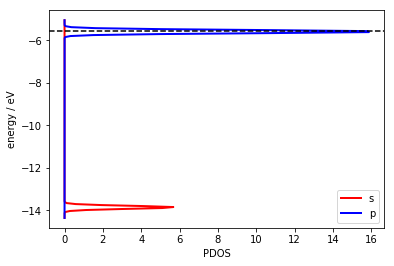

In [2]:
#Lets define a single silicon atom
Si0 = Atoms('C', positions=[(0, 0, 0)], cell=[10.0,10.1,10.2], pbc=[0,0,0])
Si0.center()
write('C0.png', Si0)
display(Image(filename='C0.png'))

#define a calculator
calcSi0 = GPAW(xc='LDA', 
               mode="lcao",
               basis='dzp',
               txt='C0.txt',
               hund=True)

Si0.set_calculator(calcSi0)

#make a single point calculation of the atom
eSi0 = Si0.get_potential_energy()

#get the Fermi energy
"""The Fermi energy is a concept in quantum mechanics usually referring to the energy difference 
between the highest and lowest occupied single-particle states in a quantum system of non-interacting 
fermions at absolute zero temperature.
The Fermi level is a total energy level including kinetic energy and potential energy."""
try:
    efSi0 = calcSi0.get_fermi_level()
except ValueError:
    efSi0 = 0
energySi0, dosSi0 = calcSi0.get_orbital_ldos(0, spin=0, angular='sp', width=0.1)

enSi0 = energySi0

#Plotting DOS by orbitals (s and p)
Spdos_Si0 = [0] * len(dosSi0)
Ppdos_Si0 = [0] * len(dosSi0)
temp = calcSi0.get_orbital_ldos(0, spin=0, angular='s', width=0.1)[1]
Spdos_Si0 = list(np.array(Spdos_Si0) + np.array(temp))
temp = calcSi0.get_orbital_ldos(0, spin=0, angular='p', width=0.1)[1]
Ppdos_Si0 = list(np.array(Ppdos_Si0) + np.array(temp))

#plt.plot(dosLi0, enLi0, 'k-', linewidth = 4.0, label='dos')
plt.plot(Spdos_Si0, enSi0, 'r-', linewidth = 2.0, label = 's')
plt.plot(Ppdos_Si0, enSi0, 'b-',linewidth = 2.0, label = 'p')
plt.axhline(y=efSi0, color='k', linestyle='--')

#plt.ylim(-7,7)
plt.xlabel('PDOS')
plt.ylabel('energy / eV')
plt.legend(loc='best')
plt.show()

### Two lithium atoms (diatomic)

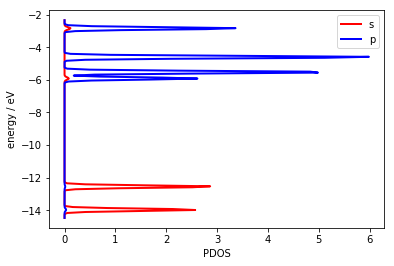

In [3]:
Li_2 = Atoms('C2', positions=[(0, 0, 0), (2.46, 0, 0)], cell=[10.0,10.0,10.0], pbc=[0,0,0])
Li_2.center()
write('C_2.png', Li_2)
display(Image(filename='C_2.png'))

calcLi_2 = GPAW(xc='LDA', 
                mode="lcao",
                basis='dzp',
                occupations=FermiDirac(0.1, fixmagmom=True),
                spinpol=True,
                txt='C_2.txt')

Li_2.set_calculator(calcLi_2)
eLi_2 = Li_2.get_potential_energy()

#get the Fermi energy
try:
    efLi_2 = calcLi_2.get_fermi_level()
except ValueError:
    efLi_2 = 0
energyLi_2, dosLi_2 = calcLi_2.get_orbital_ldos(0, spin=0, angular='sp', width=0.1)

enLi_2 = energyLi_2

Spdos_Li_2 = [0] * len(dosLi_2)
Ppdos_Li_2 = [0] * len(dosLi_2)
temp = calcLi_2.get_orbital_ldos(0, spin=0, angular='s', width=0.1)[1]
Spdos_Li_2 = list(np.array(Spdos_Li_2) + np.array(temp))
temp = calcLi_2.get_orbital_ldos(0, spin=0, angular='p', width=0.1)[1]
Ppdos_Li_2 = list(np.array(Ppdos_Li_2) + np.array(temp))

#plt.plot(dosLi_2, enLi_2, 'k-', linewidth = 4.0, label='dos')
plt.plot(Spdos_Li_2, enLi_2, 'r-', linewidth = 2.0, label = 's')
plt.plot(Ppdos_Li_2, enLi_2, 'b-',linewidth = 2.0, label = 'p')
#plt.axhline(y=efLi_2, color='k', linestyle='--')

#plt.ylim(-7,7)
plt.xlabel('PDOS')
plt.ylabel('energy / eV')
plt.legend(loc='best')
plt.show()

### 1D lithuim wire

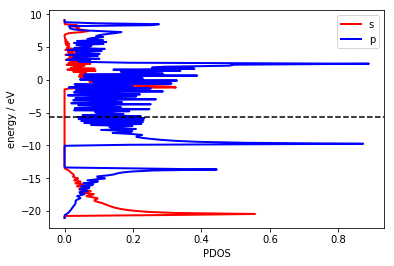

In [ ]:

Li1 = Atoms('C', positions=[(0, 0, 0)], cell=[1.42,10,10], pbc=[1,0,0])
Li1.center()
write('C1.png', Li1*(5,1,1))
display(Image(filename='C1.png'))

calcLi1 = GPAW(xc='LDA', 
               mode="lcao",
               kpts=(100,1,1),
               basis='dzp',
               txt='C1.txt')

Li1.set_calculator(calcLi1)
eLi1 = Li1.get_potential_energy()

#get the Fermi energy
try:
    efLi1 = calcLi1.get_fermi_level()
except ValueError:
    efLi1 = 0
energyLi1, dosLi1 = calcLi1.get_orbital_ldos(0, spin=0, angular='sp', width=0.1)

enLi1 = energyLi1

Spdos_Li1 = [0] * len(dosLi1)
Ppdos_Li1 = [0] * len(dosLi1)
temp = calcLi1.get_orbital_ldos(0, spin=0, angular='s', width=0.1)[1]
Spdos_Li1 = list(np.array(Spdos_Li1) + np.array(temp))
temp = calcLi1.get_orbital_ldos(0, spin=0, angular='p', width=0.1)[1]
Ppdos_Li1 = list(np.array(Ppdos_Li1) + np.array(temp))

#plt.plot(dosLi1, enLi1, 'k-', linewidth = 1.0, label='dos')
plt.plot(Spdos_Li1, enLi1, 'r-', linewidth = 2.0, label = 's')
plt.plot(Ppdos_Li1, enLi1, 'b-',linewidth = 2.0, label = 'p')
plt.axhline(y=efLi1, color='k', linestyle='--')

#plt.ylim(-10,10)
plt.xlabel('PDOS')
plt.ylabel('energy / eV')
plt.legend(loc='best')
plt.show()

### 2D lithium slab

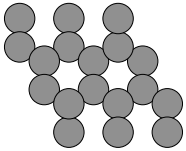

In [ ]:
Li2 = Graphene(symbol='C', latticeconstant={'a':2.461, 'c':6.708},size=(3,3,1))
Li2.center()
write('C2.png', Li2)#*(3,3,1))
display(Image(filename='C2.png'))

calcLi2 = GPAW(xc='LDA', 
               mode="lcao",
               kpts=(40,40,1),
               basis='dzp',
               txt='C2.txt')

Li2.set_calculator(calcLi2)
eLi2 = Li2.get_potential_energy()

#get the Fermi energy
try:
    efLi2 = calcLi2.get_fermi_level()
except ValueError:
    efLi2 = 0
energyLi2, dosLi2 = calcLi2.get_orbital_ldos(0, spin=0, angular='sp', width=0.1)

enLi2 = energyLi2

Spdos_Li2 = [0] * len(dosLi2)
Ppdos_Li2 = [0] * len(dosLi2)
temp = calcLi2.get_orbital_ldos(0, spin=0, angular='s', width=0.1)[1]
Spdos_Li2 = list(np.array(Spdos_Li2) + np.array(temp))
temp = calcLi2.get_orbital_ldos(0, spin=0, angular='p', width=0.1)[1]
Ppdos_Li2 = list(np.array(Ppdos_Li2) + np.array(temp))

#plt.plot(dosLi1, enLi1, 'k-', linewidth = 1.0, label='dos')
plt.plot(Spdos_Li1, enLi1, 'r-', linewidth = 2.0, label = 's')
plt.plot(Ppdos_Li1, enLi1, 'b-',linewidth = 2.0, label = 'p')
plt.axhline(y=efLi1, color='k', linestyle='--')

#plt.ylim(-10,10)
plt.xlabel('PDOS')
plt.ylabel('energy / eV')
plt.legend(loc='best')
plt.show()

### 3D Lithium crystal

In [ ]:
Li3 = Graphene(symbol='C', latticeconstant={'a':2.461, 'c':6.708},size=(2,2,2))
Li3.pbc = (True, True, True) #pbc = periodic boundary conditions
#view(Li)
write('Li3.png', Li3*(2,2,2))
display(Image(filename='Li3.png'))

calcLi3 = GPAW(xc='LDA', 
               mode="lcao",
               kpts=(16,16,16),
               basis='dzp',
               txt='Li3.txt')

Li3.set_calculator(calcLi3)
eLi3 = Li3.get_potential_energy()

#get the Fermi energy
try:
    efLi3 = calcLi3.get_fermi_level()
except ValueError:
    efLi3 = 0
energyLi3, dosLi3 = calcLi3.get_orbital_ldos(0, spin=0, angular='sp', width=0.1)

enLi3 = energyLi3

Spdos_Li3 = [0] * len(dosLi3)
Ppdos_Li3 = [0] * len(dosLi3)
temp = calcLi3.get_orbital_ldos(0, spin=0, angular='s', width=0.1)[1]
Spdos_Li3 = list(np.array(Spdos_Li3) + np.array(temp))
temp = calcLi3.get_orbital_ldos(0, spin=0, angular='p', width=0.1)[1]
Ppdos_Li3 = list(np.array(Ppdos_Li3) + np.array(temp))

#plt.plot(dosLi2, enLi2, 'k-', linewidth = 1.0, label='dos')
plt.plot(Spdos_Li3, enLi3, 'r-', linewidth = 2.0, label = 's')
plt.plot(Ppdos_Li3, enLi3, 'b-',linewidth = 2.0, label = 'p')
plt.axhline(y=efLi3, color='k', linestyle='--')

plt.ylim(-7,7)
plt.xlabel('PDOS')
plt.ylabel('energy / eV')
plt.legend(loc='best')
plt.show()